### Bagian ini untuk text preprocessing pada Dataset_Toba.csv 
### Kolom yang akan dijadikan tf-idf adalah kolom deskripsi dan aktivitas
### Setelahnya membuat matriks cosine similarity dan disimpan ke dalam file similarity_matrix.pkl

In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
#pip install nltk
#pip install sastrawi
nltk.download('punkt')
nltk.download('punkt_tab')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Ini library library yang dibutuhkan

In [2]:
dfReal = pd.read_csv('../0. Dataset/Dataset_Toba.csv')
df = dfReal.copy()
deletedColumn = ['link','image_url', 'address', 'opening_hours', 'latitude','longitude','kecamatan', 'rating', 'reviews','biaya_masuk','biaya_parkir_motor','biaya_parkir_mobil']
df.drop(deletedColumn, axis=1, inplace=True)

In [3]:
df.head(2)

,title,kategori,aktivitas,deskripsi
0,Hill of Gibeon,Alam,"Aktivitas Air, Berenang, Pemandangan, Santai, ...","Terletak di Kabupaten Toba, Sumatera Utara, Bu..."
1,Situmurun Waterfall,Bahari,"Perahu, Berenang, Pemandangan, Fotografi","Air Terjun Situmurun, yang berlokasi di Jonggi..."


Pada fitur kategori, aktivitas, deskripsi. Kita akan melakukan Text Preprocessing seperti: 
- Membuat semua menjadi lowercase, 
- Menghapus punctuation (tanda baca seperti . ! ? dll), 
- dan Menghapus stopword (seperti kata 'yang', 'ke', dll)
- dll

In [4]:
import ast

def convert(text):
    l = []
    for i in ast.literal_eval(text):
        l.append(i['name'])
    return l

In [5]:
# Buat Semua Jadi Huruf Kecil
df[['kategori', 'aktivitas', 'deskripsi']] = df[['kategori', 'aktivitas', 'deskripsi']].apply(lambda x: x.str.lower())


Mengubah semua menjadi huruf kecil

In [6]:
import string
# Tokenisasi: pisah berdasarkan koma, hapus spasi, buang kosong
df['aktivitas_token'] = df['aktivitas'].apply(
    lambda x: [item.strip() for item in x.split(',') if item.strip()]
)

# Tokenisasi Kategori
df['kategori_token'] = df['kategori'].apply(
    lambda x: [item.strip() for item in x.split(',') if item.strip()]
)

# Tokenisasi Deskripsi sekalian menghilangkan tanda baca
df['deskripsi_token'] = df['deskripsi'].apply(
    lambda x: [word for word in word_tokenize(x) if word.isalpha()] if isinstance(x, str) else []
)



Proses Tokenisasi pada aktivitas, kategori. untuk deskripsi langsung lakukan proses tokenisasi dan menghilangkan tanda baca

In [7]:
df.head(5)

,title,kategori,aktivitas,deskripsi,aktivitas_token,kategori_token,deskripsi_token
0,Hill of Gibeon,alam,"aktivitas air, berenang, pemandangan, santai, ...","terletak di kabupaten toba, sumatera utara, bu...","[aktivitas air, berenang, pemandangan, santai,...",[alam],"[terletak, di, kabupaten, toba, sumatera, utar..."
1,Situmurun Waterfall,bahari,"perahu, berenang, pemandangan, fotografi","air terjun situmurun, yang berlokasi di jonggi...","[perahu, berenang, pemandangan, fotografi]",[bahari],"[air, terjun, situmurun, yang, berlokasi, di, ..."
2,Danau Toba Parapat,bahari,"perahu, berenang, jet ski, banana boat, kayak,...",danau toba di area parapat adalah bagian dari ...,"[perahu, berenang, jet ski, banana boat, kayak...",[bahari],"[danau, toba, di, area, parapat, adalah, bagia..."
3,Pantai Ikan Mas Tandarabun,bahari,"berenang, memancing, perahu, santai, pemandangan",pantai ikan mas tandarabun adalah destinasi te...,"[berenang, memancing, perahu, santai, pemandan...",[bahari],"[pantai, ikan, mas, tandarabun, adalah, destin..."
4,Bukit Burung,alam,"pemandangan, trekking, fauna, santai, fotografi","terletak di siboro, kecamatan sianjur mula mul...","[pemandangan, trekking, fauna, santai, fotografi]",[alam],"[terletak, di, siboro, kecamatan, sianjur, mul..."


Lihat hasil perbandingannya

In [8]:
dropColumn = ['kategori', 'aktivitas', 'deskripsi']
df.drop(dropColumn, axis=1, inplace=True)

In [9]:
df.head(2)

,title,aktivitas_token,kategori_token,deskripsi_token
0,Hill of Gibeon,"[aktivitas air, berenang, pemandangan, santai,...",[alam],"[terletak, di, kabupaten, toba, sumatera, utar..."
1,Situmurun Waterfall,"[perahu, berenang, pemandangan, fotografi]",[bahari],"[air, terjun, situmurun, yang, berlokasi, di, ..."


In [10]:
nltk.download('stopwords')  # Hanya perlu sekali

stopwords_indonesia = stopwords.words('indonesian')
print(stopwords_indonesia)

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Kita akan menghapus stopword pada kolom deskripsi, ini adalah list stopword yang ada di kamus bahasa indonesia

In [11]:
def stopword_text(tokens):
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords_indonesia:
            cleaned_tokens.append(token)
    return cleaned_tokens

Fungsi untuk menghilangkan stopword

In [12]:
df['deskripsi_stop'] = df['deskripsi_token'].apply(stopword_text)

In [13]:
df

,title,aktivitas_token,kategori_token,deskripsi_token,deskripsi_stop
0,Hill of Gibeon,"[aktivitas air, berenang, pemandangan, santai,...",[alam],"[terletak, di, kabupaten, toba, sumatera, utar...","[terletak, kabupaten, toba, sumatera, utara, b..."
1,Situmurun Waterfall,"[perahu, berenang, pemandangan, fotografi]",[bahari],"[air, terjun, situmurun, yang, berlokasi, di, ...","[air, terjun, situmurun, berlokasi, jonggi, ni..."
2,Danau Toba Parapat,"[perahu, berenang, jet ski, banana boat, kayak...",[bahari],"[danau, toba, di, area, parapat, adalah, bagia...","[danau, toba, area, parapat, danau, vulkanik, ..."
3,Pantai Ikan Mas Tandarabun,"[berenang, memancing, perahu, santai, pemandan...",[bahari],"[pantai, ikan, mas, tandarabun, adalah, destin...","[pantai, ikan, mas, tandarabun, destinasi, ter..."
4,Bukit Burung,"[pemandangan, trekking, fauna, santai, fotografi]",[alam],"[terletak, di, siboro, kecamatan, sianjur, mul...","[terletak, siboro, kecamatan, sianjur, kabupat..."
...,...,...,...,...,...
131,Ruang Terbuka Publik Parapat,"[pemandangan, santai, fotografi, aktivitas air...",[alam],"[ruang, terbuka, publik, parapat, adalah, area...","[ruang, terbuka, publik, parapat, area, publik..."
132,Penatapan Simarjarunjung,"[pemandangan, fotografi, santai]",[alam],"[penatapan, simarjarunjung, adalah, titik, pan...","[penatapan, simarjarunjung, titik, pandang, po..."
133,Camping Ground - Parapat,"[fotografi, piknik, pemandangan]",[alam],"[camping, ground, parapat, adalah, destinasi, ...","[camping, ground, parapat, destinasi, wisata, ..."
134,Bukit Sipolha,"[santai, pemandangan]",[alam],"[bukit, sipolha, adalah, sebuah, destinasi, wi...","[bukit, sipolha, destinasi, wisata, menawarkan..."


Lihat hasil perbandingannya

In [14]:
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()
#df.drop('deskripsi_token', axis=1, inplace=True)

def stemming_text(tokens):
    hasil = [stemmer.stem(token) for token in tokens]
    return hasil

Ini fungsi stemming

In [15]:
df['deskripsi_stemming'] = df['deskripsi_stop'].apply(stemming_text)

lakukan Stemming

In [16]:
df

,title,aktivitas_token,kategori_token,deskripsi_token,deskripsi_stop,deskripsi_stemming
0,Hill of Gibeon,"[aktivitas air, berenang, pemandangan, santai,...",[alam],"[terletak, di, kabupaten, toba, sumatera, utar...","[terletak, kabupaten, toba, sumatera, utara, b...","[letak, kabupaten, toba, sumatera, utara, buki..."
1,Situmurun Waterfall,"[perahu, berenang, pemandangan, fotografi]",[bahari],"[air, terjun, situmurun, yang, berlokasi, di, ...","[air, terjun, situmurun, berlokasi, jonggi, ni...","[air, terjun, situmurun, lokasi, jonggi, nihut..."
2,Danau Toba Parapat,"[perahu, berenang, jet ski, banana boat, kayak...",[bahari],"[danau, toba, di, area, parapat, adalah, bagia...","[danau, toba, area, parapat, danau, vulkanik, ...","[danau, toba, area, parapat, danau, vulkanik, ..."
3,Pantai Ikan Mas Tandarabun,"[berenang, memancing, perahu, santai, pemandan...",[bahari],"[pantai, ikan, mas, tandarabun, adalah, destin...","[pantai, ikan, mas, tandarabun, destinasi, ter...","[pantai, ikan, mas, tandarabun, destinasi, sem..."
4,Bukit Burung,"[pemandangan, trekking, fauna, santai, fotografi]",[alam],"[terletak, di, siboro, kecamatan, sianjur, mul...","[terletak, siboro, kecamatan, sianjur, kabupat...","[letak, siboro, camat, sianjur, kabupaten, sam..."
...,...,...,...,...,...,...
131,Ruang Terbuka Publik Parapat,"[pemandangan, santai, fotografi, aktivitas air...",[alam],"[ruang, terbuka, publik, parapat, adalah, area...","[ruang, terbuka, publik, parapat, area, publik...","[ruang, buka, publik, parapat, area, publik, p..."
132,Penatapan Simarjarunjung,"[pemandangan, fotografi, santai]",[alam],"[penatapan, simarjarunjung, adalah, titik, pan...","[penatapan, simarjarunjung, titik, pandang, po...","[tatap, simarjarunjung, titik, pandang, popule..."
133,Camping Ground - Parapat,"[fotografi, piknik, pemandangan]",[alam],"[camping, ground, parapat, adalah, destinasi, ...","[camping, ground, parapat, destinasi, wisata, ...","[camping, ground, parapat, destinasi, wisata, ..."
134,Bukit Sipolha,"[santai, pemandangan]",[alam],"[bukit, sipolha, adalah, sebuah, destinasi, wi...","[bukit, sipolha, destinasi, wisata, menawarkan...","[bukit, sipolha, destinasi, wisata, tawar, pan..."


Lihat hasil perbandingannya

In [17]:
#df.drop('deskripsi_stop', axis=1, inplace=True)

In [18]:
df['tags'] = df['aktivitas_token'] + df['kategori_token'] + df['deskripsi_stemming']
dropColumn = ['aktivitas_token', 'kategori_token', 'deskripsi_stemming']
#df.drop(dropColumn, axis=1, inplace=True)
df.head(2)

,title,aktivitas_token,kategori_token,deskripsi_token,deskripsi_stop,deskripsi_stemming,tags
0,Hill of Gibeon,"[aktivitas air, berenang, pemandangan, santai,...",[alam],"[terletak, di, kabupaten, toba, sumatera, utar...","[terletak, kabupaten, toba, sumatera, utara, b...","[letak, kabupaten, toba, sumatera, utara, buki...","[aktivitas air, berenang, pemandangan, santai,..."
1,Situmurun Waterfall,"[perahu, berenang, pemandangan, fotografi]",[bahari],"[air, terjun, situmurun, yang, berlokasi, di, ...","[air, terjun, situmurun, berlokasi, jonggi, ni...","[air, terjun, situmurun, lokasi, jonggi, nihut...","[perahu, berenang, pemandangan, fotografi, bah..."


In [19]:
all_tokens = [token for sublist in df['tags'] for token in sublist]
freq_dist = FreqDist(all_tokens)
print(freq_dist.most_common())

[('alam', 255), ('danau', 220), ('toba', 149), ('pemandangan', 130), ('indah', 121), ('air', 116), ('tawar', 112), ('fotografi', 106), ('pandang', 106), ('bukit', 98), ('nikmat', 97), ('samosir', 77), ('santai', 76), ('pantai', 76), ('tenang', 71), ('wisata', 65), ('letak', 62), ('destinasi', 57), ('kabupaten', 54), ('suasana', 54), ('unjung', 51), ('tepi', 50), ('camping', 49), ('panorama', 47), ('tinggi', 46), ('pulau', 45), ('terjun', 44), ('santa', 43), ('hijau', 42), ('bahari', 37), ('trekking', 37), ('desa', 37), ('jadi', 36), ('piknik', 35), ('pasir', 34), ('sumatera', 33), ('utara', 33), ('kenal', 33), ('area', 31), ('alami', 31), ('lokasi', 31), ('camat', 31), ('tarik', 30), ('luas', 30), ('berenang', 29), ('pukau', 29), ('kawasan', 28), ('cocok', 27), ('latar', 26), ('putih', 25), ('keliling', 24), ('sejuk', 23), ('perahu', 23), ('spektakuler', 23), ('gunung', 23), ('udara', 22), ('aktivitas air', 21), ('aktivitas', 21), ('fasilitas', 21), ('ideal', 21), ('unik', 20), ('foto'

Ini untuk Visualisasi

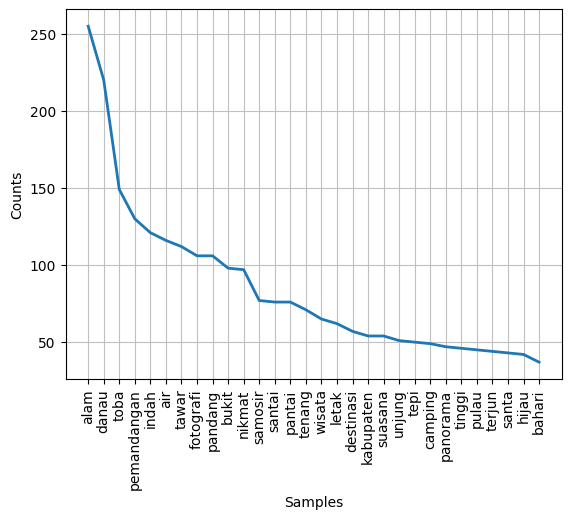

In [20]:
freq_dist.plot(30, cumulative=False)
plt.show()

Alam lebih sering muncul

In [21]:
df['tags_joined'] = df['tags'].apply(lambda x: ' '.join(x))
df['kategori'] = df['kategori_token'].apply(lambda x: ' '.join(x))




In [22]:
deletedColumn = ["aktivitas_token", "kategori_token", "deskripsi_token", "deskripsi_stop", "deskripsi_stemming", "tags"]
df.drop(deletedColumn, axis=1, inplace=True)

In [23]:
df.head()

,title,tags_joined,kategori
0,Hill of Gibeon,aktivitas air berenang pemandangan santai foto...,alam
1,Situmurun Waterfall,perahu berenang pemandangan fotografi bahari a...,bahari
2,Danau Toba Parapat,perahu berenang jet ski banana boat kayak pema...,bahari
3,Pantai Ikan Mas Tandarabun,berenang memancing perahu santai pemandangan b...,bahari
4,Bukit Burung,pemandangan trekking fauna santai fotografi al...,alam


In [24]:
dfReal['tags_joined'] = df['tags_joined']
#dfReal.info()
dfReal.head()


,title,link,image_url,rating,reviews,address,opening_hours,latitude,longitude,kategori,aktivitas,deskripsi,kecamatan,biaya_masuk,biaya_parkir_motor,biaya_parkir_mobil,tags_joined
0,Hill of Gibeon,https://www.google.com/maps/place/Hill+of+Gibe...,https://drive.google.com/drive/folders/1AVbEcO...,4.5,457,"Kabupaten Toba Samosir, 21174, Sionggang Utara...",Open 24 hours,2.590898,98.9978849865071,Alam,"Aktivitas Air, Berenang, Pemandangan, Santai, ...","Terletak di Kabupaten Toba, Sumatera Utara, Bu...",Lumban Julu,10000,2000,5000,aktivitas air berenang pemandangan santai foto...
1,Situmurun Waterfall,https://www.google.com/maps/place/Situmurun+Wa...,https://drive.google.com/drive/folders/1d313bF...,4.6,553,"Jonggi Nihuta, Hatinggian, Kec. Lumban Julu, T...",Open 07.00-17.00,2.537564,99.00797117116431,Bahari,"Perahu, Berenang, Pemandangan, Fotografi","Air Terjun Situmurun, yang berlokasi di Jonggi...",Lumban Julu,0,0,0,perahu berenang pemandangan fotografi bahari a...
2,Danau Toba Parapat,https://www.google.com/maps/place/Danau+Toba+P...,https://drive.google.com/drive/folders/1DCKxmv...,4.7,512,"Jl. Siborongborong - Parapat, Sibaganding, Kec...",Open 24 hours,2.683975,98.9260867288357,Bahari,"Perahu, Berenang, Jet Ski, Banana Boat, Kayak,...",Danau Toba di area Parapat adalah bagian dari ...,Girsang Sipangan Bolon,0,0,0,perahu berenang jet ski banana boat kayak pema...
3,Pantai Ikan Mas Tandarabun,https://www.google.com/maps/place/Pantai+Ikan+...,https://drive.google.com/drive/folders/1LmIQa4...,4.6,612,"Dosroha, Simanindo, Kabupaten Samosir, Sumater...",Open 08.00-16.00,2.716283,98.6917301288357,Bahari,"Berenang, Memancing, Perahu, Santai, Pemandangan",Pantai Ikan Mas Tandarabun adalah destinasi te...,Simanindo,5000,5000,10000,berenang memancing perahu santai pemandangan b...
4,Bukit Burung,https://www.google.com/maps/place/Bukit+Burung...,https://drive.google.com/drive/folders/1egIrSU...,4.7,141,"Siboro, Kec. Sianjur Mula Mula, Kabupaten Samo...",Open 24 hours,2.631885,98.65489004232862,Alam,"Pemandangan, Trekking, Fauna, Santai, Fotografi","Terletak di Siboro, Kecamatan Sianjur Mula Mul...",Sianjur Mula Mula,0,5000,5000,pemandangan trekking fauna santai fotografi al...


In [25]:
dfReal.to_csv("../Dataset_Text_Processed.csv", index=False)

In [26]:
# TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['tags_joined'])

In [27]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.tail()


,abadi,above,acara,ada,adat,administratif,adrenalin,aek,aekkhori,agam,...,warna,warung,waterfront,web,wilayah,wis,wisata,wisatawan,yesus,zona
131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.080372,0.000000,0.0,0.0
132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.093494,0.000000,0.0,0.0
134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.111976,0.166322,0.0,0.0
135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [28]:
similarity_matrix = cosine_similarity(tfidf_matrix)

In [29]:
import pickle

# Simpan similarity_matrix
with open('./Save Model/similarity_matrix.pkl', 'wb') as f:
    pickle.dump(similarity_matrix, f)


In [30]:
df_sim = pd.DataFrame(similarity_matrix, index=df['title'], columns=df['title'])
df_sim.head()

title,Hill of Gibeon,Situmurun Waterfall,Danau Toba Parapat,Pantai Ikan Mas Tandarabun,Bukit Burung,Pantai Bebas Parapat Danau Toba,Bukit Sibeabea,Pantai Batuhoda,Gunung Pusuk Buhit,Aek Rangat,...,Aek Nauli Elephant Conservation Camp (ANECC),Taman Bunga Sapo Juma,Aek Batu Sipolha,Pantai Batu Papan Indah,Wisata ilmiah taman rusa aeknaul,Ruang Terbuka Publik Parapat,Penatapan Simarjarunjung,Camping Ground - Parapat,Bukit Sipolha,Ancol beach Pangururan
title,,,,,,,,,,,,,,,,,,,,,
Hill of Gibeon,1.000000,0.275694,0.239069,0.157333,0.143557,0.115455,0.201969,0.111420,0.139506,0.141225,...,0.050690,0.062633,0.124145,0.064374,0.050322,0.119607,0.129959,0.130084,0.157850,0.116554
Situmurun Waterfall,0.275694,1.000000,0.195329,0.145619,0.041580,0.093146,0.076429,0.156922,0.113958,0.101077,...,0.054605,0.013013,0.112138,0.042472,0.030022,0.107911,0.070749,0.064505,0.042068,0.092271
Danau Toba Parapat,0.239069,0.195329,1.000000,0.255292,0.111123,0.275339,0.140110,0.225820,0.091158,0.075452,...,0.004301,0.059488,0.183538,0.102243,0.024287,0.253180,0.234812,0.173577,0.174950,0.148559
Pantai Ikan Mas Tandarabun,0.157333,0.145619,0.255292,1.000000,0.078614,0.301348,0.129490,0.400345,0.103931,0.069129,...,0.002225,0.040732,0.260670,0.170022,0.028390,0.145304,0.119583,0.036355,0.202453,0.208355
Bukit Burung,0.143557,0.041580,0.111123,0.078614,1.000000,0.112246,0.217492,0.060417,0.177158,0.054784,...,0.051809,0.071544,0.049495,0.093497,0.085302,0.037818,0.130346,0.076352,0.130627,0.062759


In [31]:
def rekomendasi_tempat(nama_tempat, df, similarity_matrix, top_n=5):
    if nama_tempat not in df['title'].values:
        return f"Tempat '{nama_tempat}' tidak ditemukan dalam data."
    
    # Ambil index dari tempat
    idx = df[df['title'] == nama_tempat].index[0]
    
    # Ambil skor similarity-nya
    sim_scores = list(enumerate(similarity_matrix[idx]))
    
    # Urutkan berdasarkan skor tertinggi (kecuali dirinya sendiri)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+2]  # ambil top-n

    # Ambil hasil rekomendasi
    rekomendasi = []
    for i, score in sim_scores:
        rekomendasi.append({
            'title': df.iloc[i]['title'],
            'kategori': df.iloc[i]['kategori'],
            'similarity': round(score, 3)
        })
    
    return rekomendasi

In [32]:
rekomendasi = rekomendasi_tempat("Danau Pea Porohan", df, similarity_matrix)
for r in rekomendasi:
    print(f"{r['title']} ({r['kategori']}) - Similarity: {r['similarity']}")


Danau Pea Na Bolak (alam) - Similarity: 0.248
Danau Aek Natonang (alam) - Similarity: 0.214
Wisata Alam Fishing-Camp Siarubung (alam) - Similarity: 0.208
Perkemahan Paropo (alam) - Similarity: 0.201
Bukit Indah Sitalmak Talmak Sihotang (alam) - Similarity: 0.191
Pea Roba (alam) - Similarity: 0.19
